# ***Building Energy Benchmarking : analyse exploratoire***

La première partie de cette étude consiste en simplement explorer les données et voir s'il y a eventuellement un nettoyage à faire. On essaiera de mettre en valeur les variables qui pourraient être utiles pour la suite, c'est  à dire pour l'entrainement d'algorithmes dans le but de prédire la consommation des batiments par leurs caractéristiques). 

# ***Table des matières :***



*   Partie 1 : Analyses univariées
*   Partie 2 : Analyses multivariées
*   Partie 3 : Conclusions



**Imports et versions :**

In [84]:
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import scipy as sp
import scipy.stats as stats
import missingno as msno

In [85]:
print("numpy version :", np.__version__)
print("matplotlib version :", mtl.__version__)
print("seaborn version :", sns.__version__)
print("pandas version :",pd.__version__)
print("scipy version :",sp.__version__)
print("msno version :",msno.__version__)

numpy version : 1.21.6
matplotlib version : 3.2.2
seaborn version : 0.11.2
pandas version : 1.3.5
scipy version : 1.7.3
msno version : 0.5.1


**Chargement du dataset et quelques informations :**

In [86]:
df = pd.read_csv("drive/MyDrive/CSV/2016_Building_Energy_Benchmarking.csv", sep=',')
print('Taille du dataset :', df.shape)
print('Doublons du dataset :', df.duplicated().sum())

Taille du dataset : (3376, 46)
Doublons du dataset : 0


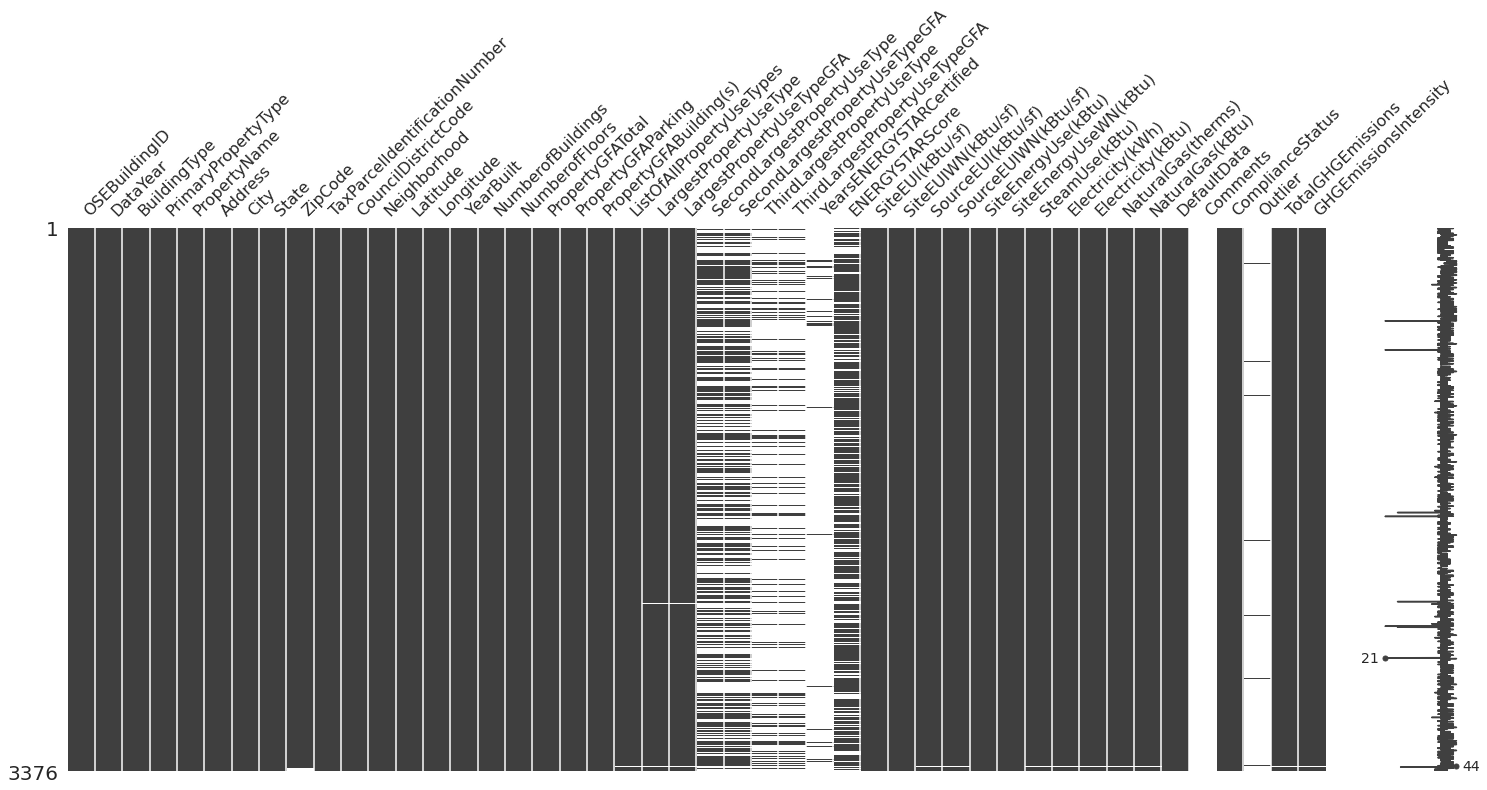

In [87]:
msno.matrix(df)

# **Partie 1 : Analyses univariées**

On regarde dans un premier temps les statistiques sur les features du dataset. 
On s'intéresse dans cette partie surtout aux variables catégorielles qui nous donnent un peu plus d'informations sur la répartition des types de d'immeubles et leur usages dans le ville de Seattle.



Text(0.5, 1.0, 'Primary property type repartition')

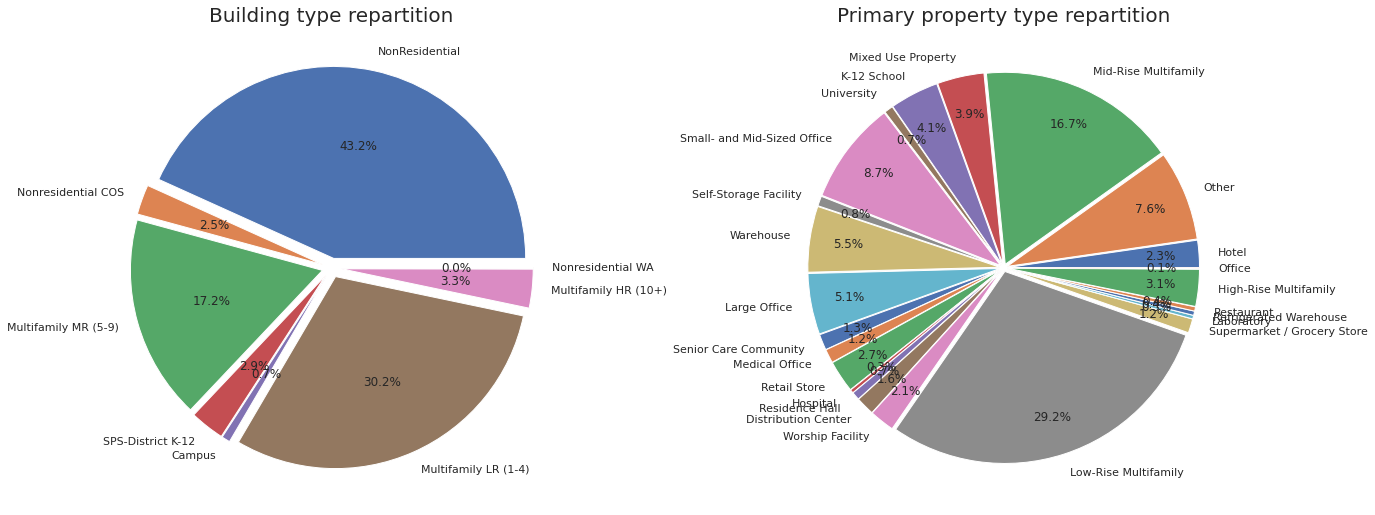

In [88]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12), facecolor='white')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.4,hspace=0.4)

# Building type
labels = df['BuildingType'].unique()
y = [df.loc[df['BuildingType']==label, 'BuildingType'].count() for label in labels]
explode = [0.05 for i in y]
ax[0].pie(y, labels=labels, autopct='%1.1f%%', explode=explode)
ax[0].set_title('Building type repartition', fontsize=20)

# Primary proprety type
labels = df['PrimaryPropertyType'].unique()
y = [df.loc[df['PrimaryPropertyType']==label, 'PrimaryPropertyType'].count() for label in labels]
explode = [0.02 for i in y]
ax[1].pie(y, labels=labels, autopct='%1.1f%%', explode=explode, pctdistance=0.8)
ax[1].set_title('Primary property type repartition', fontsize=20)

Text(0.5, 1.0, 'Neighborhood repartition')

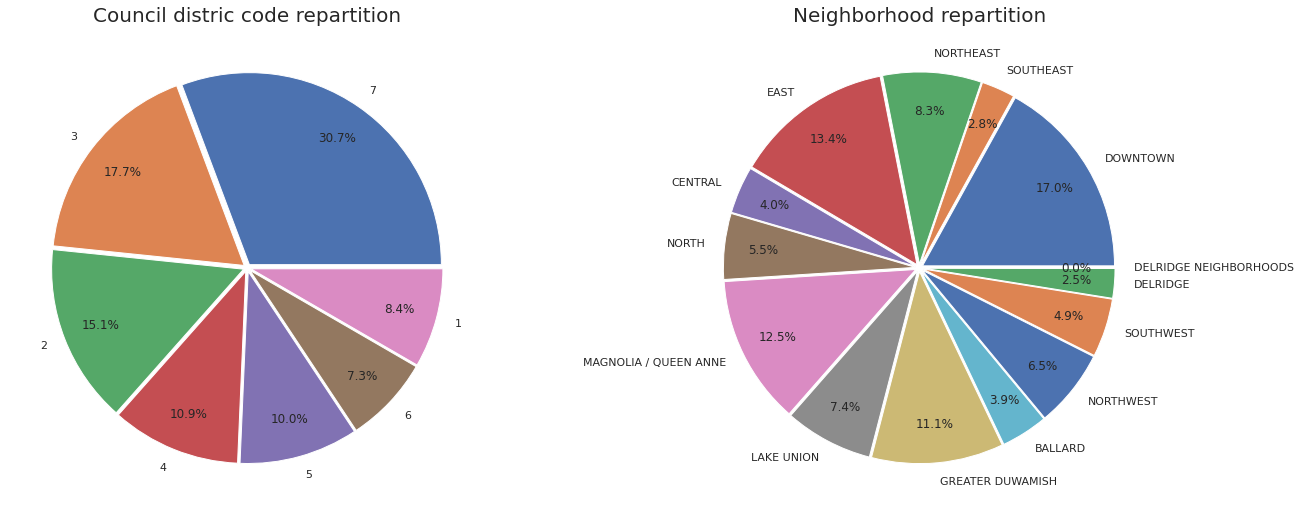

In [89]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12), facecolor='white')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.4,hspace=0.4)

# Council distric code
labels = df['CouncilDistrictCode'].unique()
y = [df.loc[df['CouncilDistrictCode']==label, 'CouncilDistrictCode'].count() for label in labels]
explode = [0.02 for i in y]
ax[0].pie(y, labels=labels, autopct='%1.1f%%', explode=explode, pctdistance=0.8)
ax[0].set_title('Council distric code repartition', fontsize=20)

# Council distric code
df['Neighborhood'] = df['Neighborhood'].str.upper()
labels = df['Neighborhood'].unique()
y = [df.loc[df['Neighborhood']==label, 'Neighborhood'].count() for label in labels]
explode = [0.02 for i in y]
ax[1].pie(y, labels=labels, autopct='%1.1f%%', explode=explode, pctdistance=0.8)
ax[1].set_title('Neighborhood repartition', fontsize=20)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


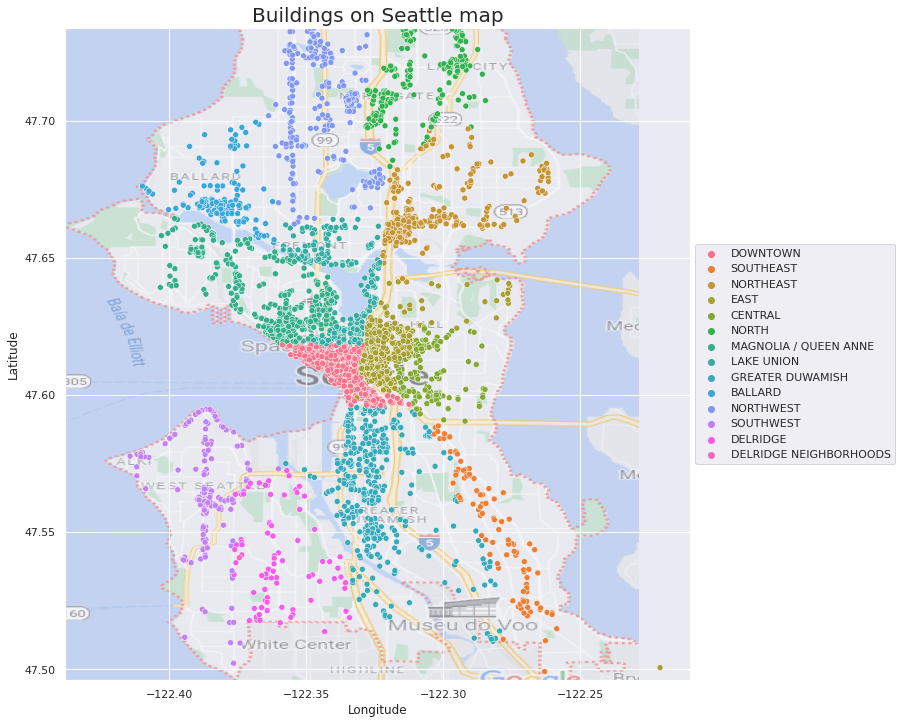

In [90]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12), facecolor='white')
ax.set_title('Buildings on Seattle map', fontsize=20)

# Scatter plot
img = plt.imread("drive/MyDrive/IMG/seattle.png")
x = df['Longitude']
y = df['Latitude']
hue = df['Neighborhood']
ax.imshow(img, extent=[-122.438, -122.229, 47.496, 47.7339], alpha=0.5)
sns.scatterplot(x,y,hue=hue)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'Year Built histogram')

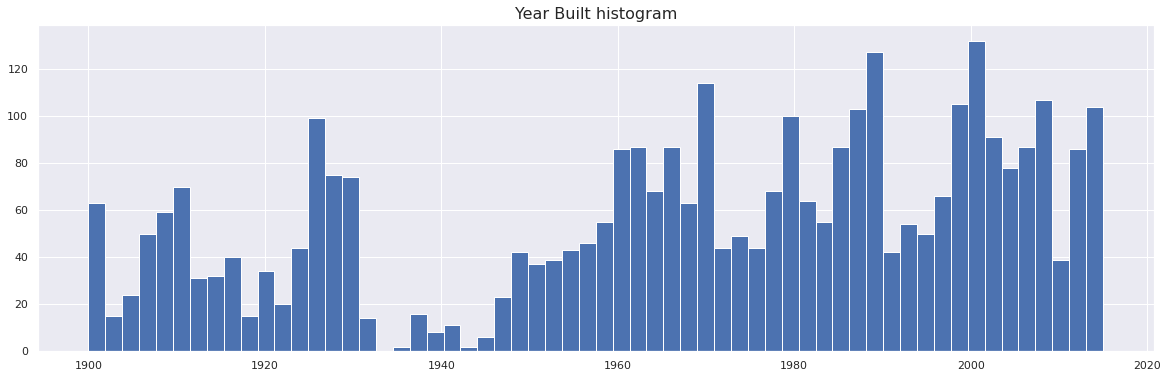

In [91]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6), facecolor='white')

# Year Built
y=df['YearBuilt']
ax.hist(y, bins=60)
ax.set_title('Year Built histogram', fontsize=16)

In [92]:
df[['NumberofBuildings', 'NumberofFloors']].describe()

NumberofBuildings  NumberofFloors
count        3368.000000     3376.000000
mean            1.106888        4.709123
std             2.108402        5.494465
min             0.000000        0.000000
25%             1.000000        2.000000
50%             1.000000        4.000000
75%             1.000000        5.000000
max           111.000000       99.000000

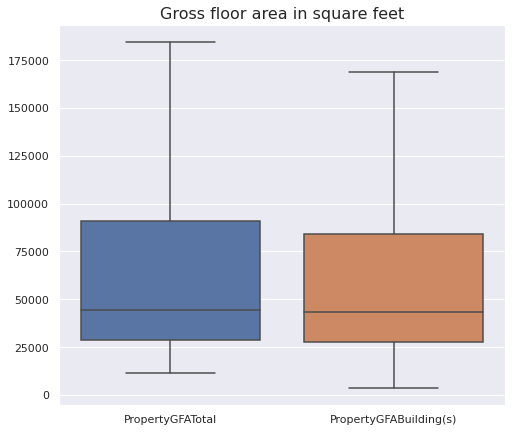

In [93]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7), facecolor='white')
ax.set_title('Gross floor area in square feet', fontsize=16)

# boxplot
x=df[['PropertyGFATotal', 'PropertyGFABuilding(s)']]
sns.boxplot(data=x, showfliers = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Text(0.5, 1.0, 'Third Largest Property Use Type')

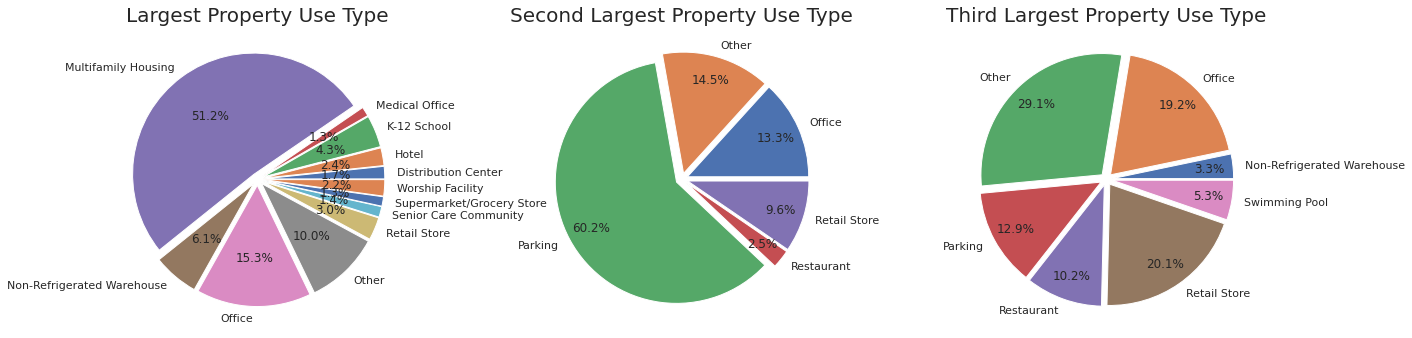

In [94]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,12), facecolor='white')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.4,hspace=0.4)

# LargestPropertyUseType
data = (df[['LargestPropertyUseType', 'City']].groupby('LargestPropertyUseType').count()/df.shape[0]*100).round(2)
other_percent = data.loc[data['City']<=1].sum()
data = data.loc[data['City']>1]
data.loc['Other'] = other_percent
explode = [0.05 for i in data['City']]
ax[0].pie(x=data, labels=data.index, autopct='%1.1f%%', explode=explode)
ax[0].set_title('Largest Property Use Type', fontsize=20)

# SecondLargestPropertyUseType
data = (df[['SecondLargestPropertyUseType', 'City']].groupby('SecondLargestPropertyUseType').count()/df.shape[0]*100).round(2)
other_percent = data.loc[data['City']<=1].sum()
data = data.loc[data['City']>1]
data.loc['Other'] = other_percent
explode = [0.05 for i in data['City']]
ax[1].pie(x=data, labels=data.index, autopct='%1.1f%%', explode=explode, pctdistance=0.8)
ax[1].set_title('Second Largest Property Use Type', fontsize=20)

# ThirdLargestPropertyUseType
data = (df[['ThirdLargestPropertyUseType', 'City']].groupby('ThirdLargestPropertyUseType').count()/df.shape[0]*100).round(2)
other_percent = data.loc[data['City']<=0.5].sum()
data = data.loc[data['City']>0.5]
data.loc['Other'] = other_percent
explode = [0.05 for i in data['City']]
ax[2].pie(x=data, labels=data.index, autopct='%1.1f%%', explode=explode, pctdistance=0.8)
ax[2].set_title('Third Largest Property Use Type', fontsize=20)

In [95]:
df[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']].describe()

LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               3.356000e+03                      1679.000000   
mean                7.917764e+04                     28444.075817   
std                 2.017034e+05                     54392.917928   
min                 5.656000e+03                         0.000000   
25%                 2.509475e+04                      5000.000000   
50%                 3.989400e+04                     10664.000000   
75%                 7.620025e+04                     26640.000000   
max                 9.320156e+06                    686750.000000   

       ThirdLargestPropertyUseTypeGFA  
count                      596.000000  
mean                     11738.675166  
std                      29331.199286  
min                          0.000000  
25%                       2239.000000  
50%                       5043.000000  
75%                      10138.750000  
max                     459748.000000

In [96]:
df[df.columns[28:40]].describe()

ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05   
50%             96.199997            101.099998         1.803753e+06   
75%            143.899994            148.349998         4.222455e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  
count       3.367000e+03        3.367000e+03      3.367000e+03  
mean        3.707612e+06        1.368505e+04      1.368505e+06  
std         1.485066e+07        6.709781e+04      6.709781e+06  
min        -1.154170e+05        0.000000e+00      0.000000e+00  
25%         6.394870e+05        0.000000e+00      0.000000e+00  
50%         1.177583e+06        3.237538e+03      3.237540e+05  
75%         2.829632e+06        1.189033e+04      1.189034e+06  
max         6.570744e+08        2.979090e+06      2.979090e+08

In [97]:
df[df.columns[-2:]].describe()

TotalGHGEmissions  GHGEmissionsIntensity
count        3367.000000            3367.000000
mean          119.723971               1.175916
std           538.832227               1.821452
min            -0.800000              -0.020000
25%             9.495000               0.210000
50%            33.920000               0.610000
75%            93.940000               1.370000
max         16870.980000              34.090000

# **Partie 2 : Analyses multivariées**

Dans cette partie on cherche à mettre en valeur les liens entre les différentes features du dataset. Les différentes pistes à explorer sont les liens entre les features qui représentent : la position de l'immeuble, son age, sa forme, sa taille, son utilisation, sa consommation d'énergie et sa pollution. 

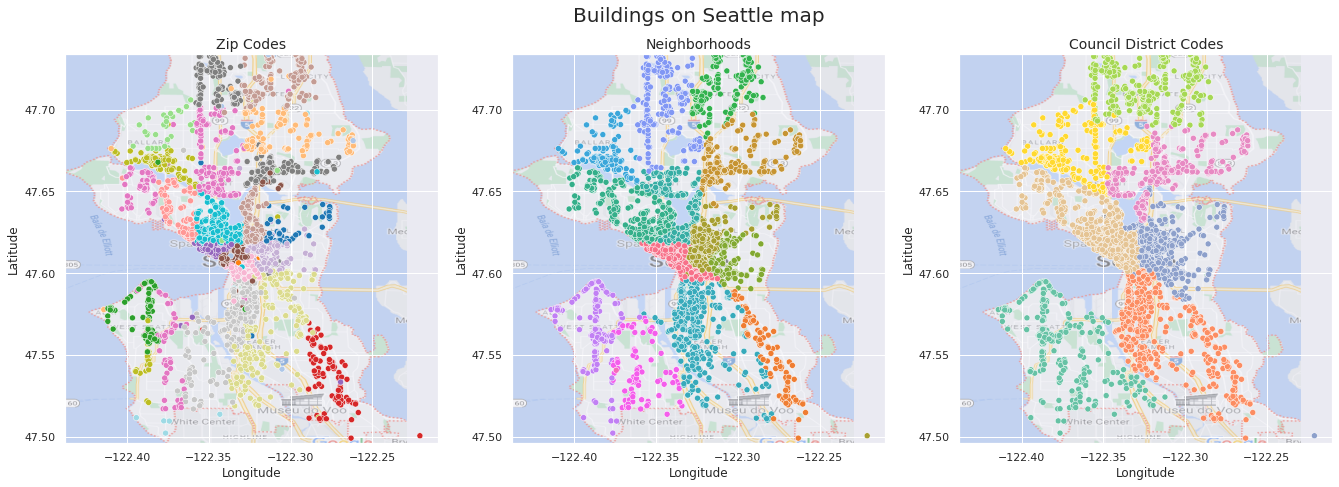

In [98]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22,7), facecolor='white')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.2,hspace=0.4)
fig.suptitle('Buildings on Seattle map', fontsize=20)

# Scatter plot
img = plt.imread("drive/MyDrive/IMG/seattle.png")
x = df['Longitude']
y = df['Latitude']
hue = df['ZipCode']
ax[0].set_title('Zip Codes', fontsize=14)
ax[0].imshow(img, extent=[-122.438, -122.229, 47.496, 47.7339], alpha=0.5)
sns.scatterplot(x=x,y=y,hue=hue,ax=ax[0], palette='tab20', legend=False)

# Scatter plot
img = plt.imread("drive/MyDrive/IMG/seattle.png")
x = df['Longitude']
y = df['Latitude']
hue = df['Neighborhood']
ax[1].set_title('Neighborhoods', fontsize=14)
ax[1].imshow(img, extent=[-122.438, -122.229, 47.496, 47.7339], alpha=0.5)
sns.scatterplot(x=x,y=y,hue=hue,ax=ax[1],legend=False)

# Scatter plot
img = plt.imread("drive/MyDrive/IMG/seattle.png")
x = df['Longitude']
y = df['Latitude']
hue = df['CouncilDistrictCode']
ax[2].set_title('Council District Codes', fontsize=14)
ax[2].imshow(img, extent=[-122.438, -122.229, 47.496, 47.7339], alpha=0.5)
sns.scatterplot(x=x,y=y,hue=hue,ax=ax[2],palette='Set2',legend=False)

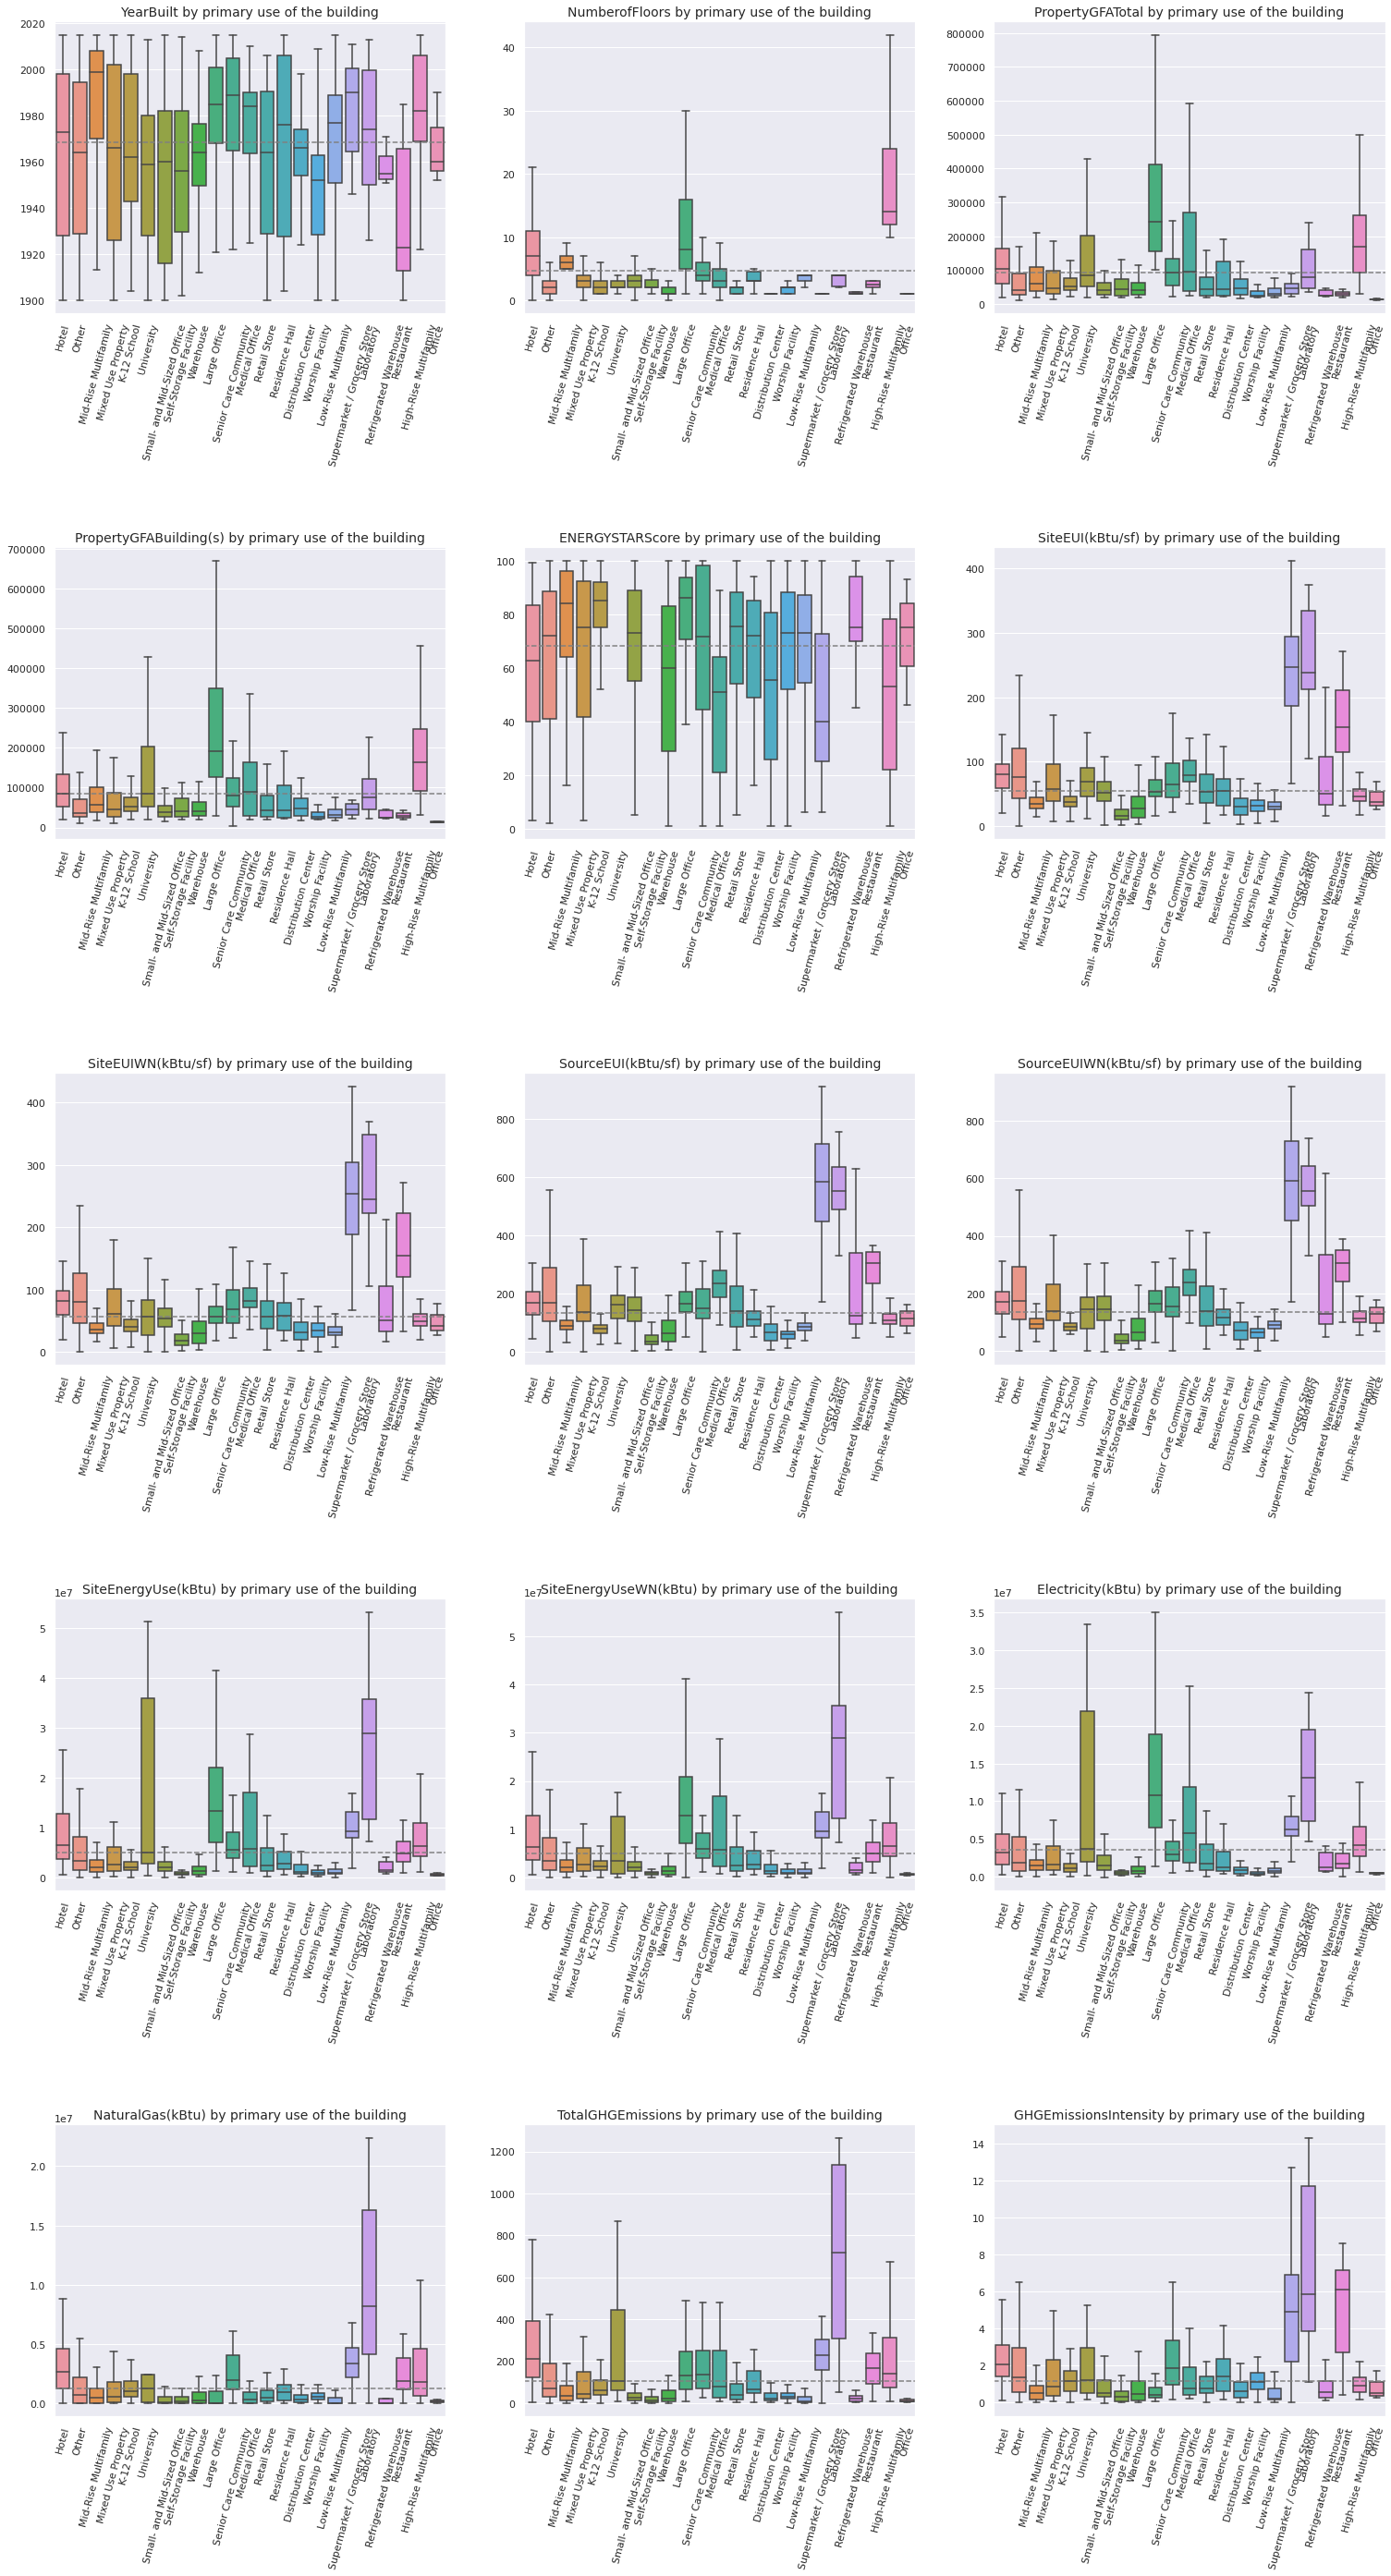

In [99]:
#needs
types=df.dtypes
types=types[(types=='float64')|(types=='int64')]
types=types.index.drop(['Comments', 'ZipCode', 'Latitude', 'Longitude', 'DataYear', 'OSEBuildingID', 'CouncilDistrictCode'])
types=types.drop(['SteamUse(kBtu)', 'NumberofBuildings', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                  'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'NaturalGas(therms)'])
types=np.array(types)
types=np.reshape(types,(5,3))

#set
sns.set()
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(25,45), facecolor='white')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.2,hspace=0.8)

#plot
#Hospital retiré car des valeurs trop importantes comparées aux autres catégories
for i in range(5):
  for j in range(3):
    data=df[['PrimaryPropertyType', types[i,j]]]
    data=data.loc[data['PrimaryPropertyType']!='Hospital']
    mean=data[types[i,j]].mean()
    sns.boxplot(data=data, y=types[i,j], x='PrimaryPropertyType', ax=ax[i,j], showfliers = False)
    ax[i,j].axhline(y=mean, ls='--', color='gray')
    ax[i,j].set_title("{} by primary use of the building".format(types[i,j]), fontsize=14)
    ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=75)
    ax[i,j].set(xlabel=None)
    ax[i,j].set(ylabel=None)

Text(0.5, 1.0, 'Correlation between numerical features')

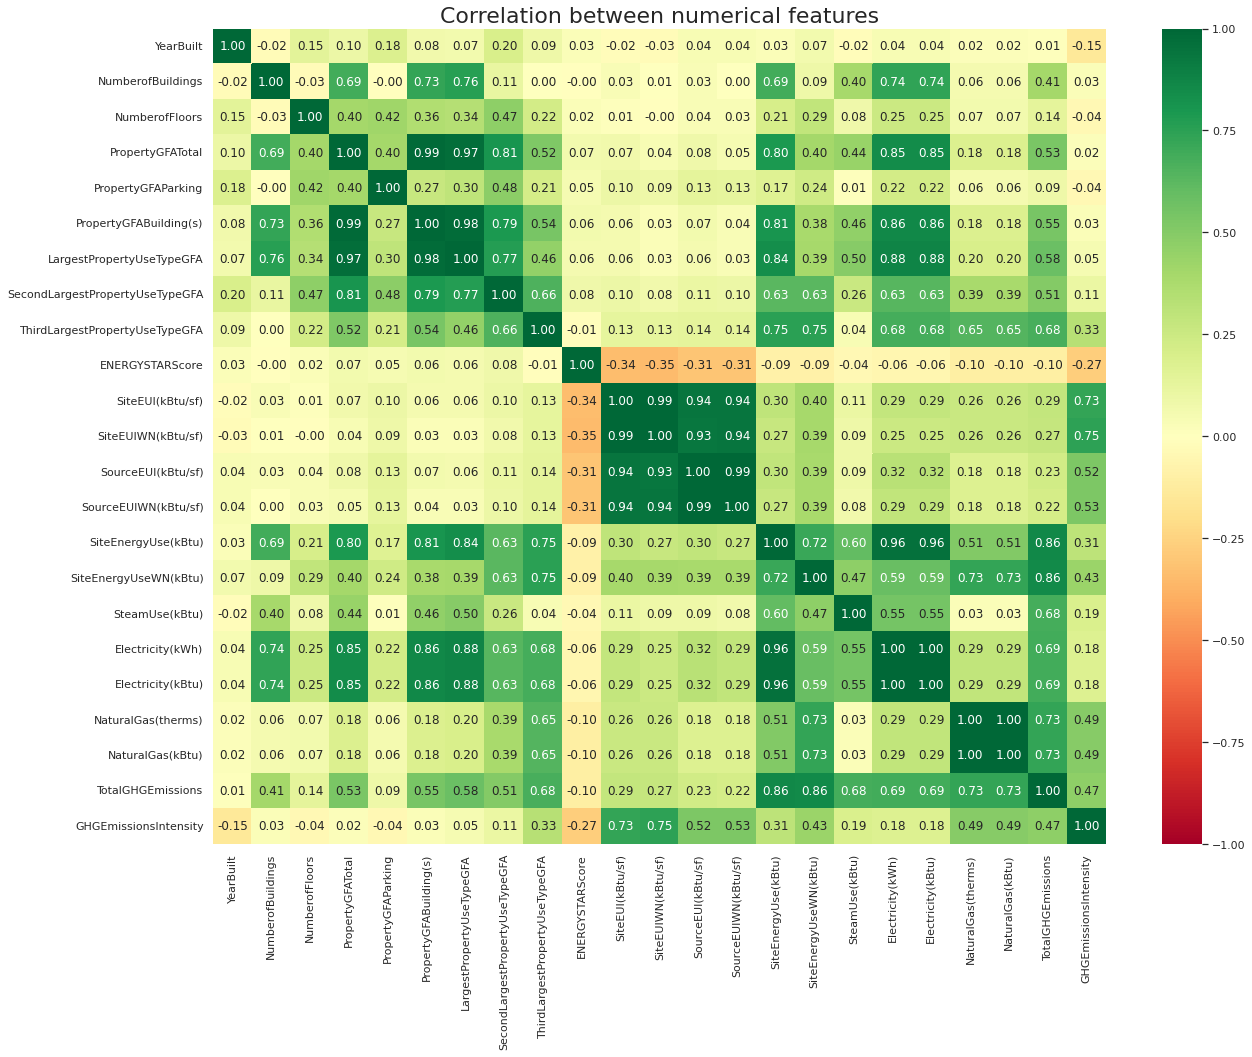

In [100]:
#data
types=df.dtypes
types=types[(types=='float64')|(types=='int64')]
types=types.index.drop(['Comments', 'ZipCode', 'Latitude', 'Longitude', 'DataYear', 'OSEBuildingID', 'CouncilDistrictCode'])
correlation = df[types].corr(method='pearson')

#plot
sns.set()
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", fmt="0.2f")
ax.set_title('Correlation between numerical features', fontsize=22)

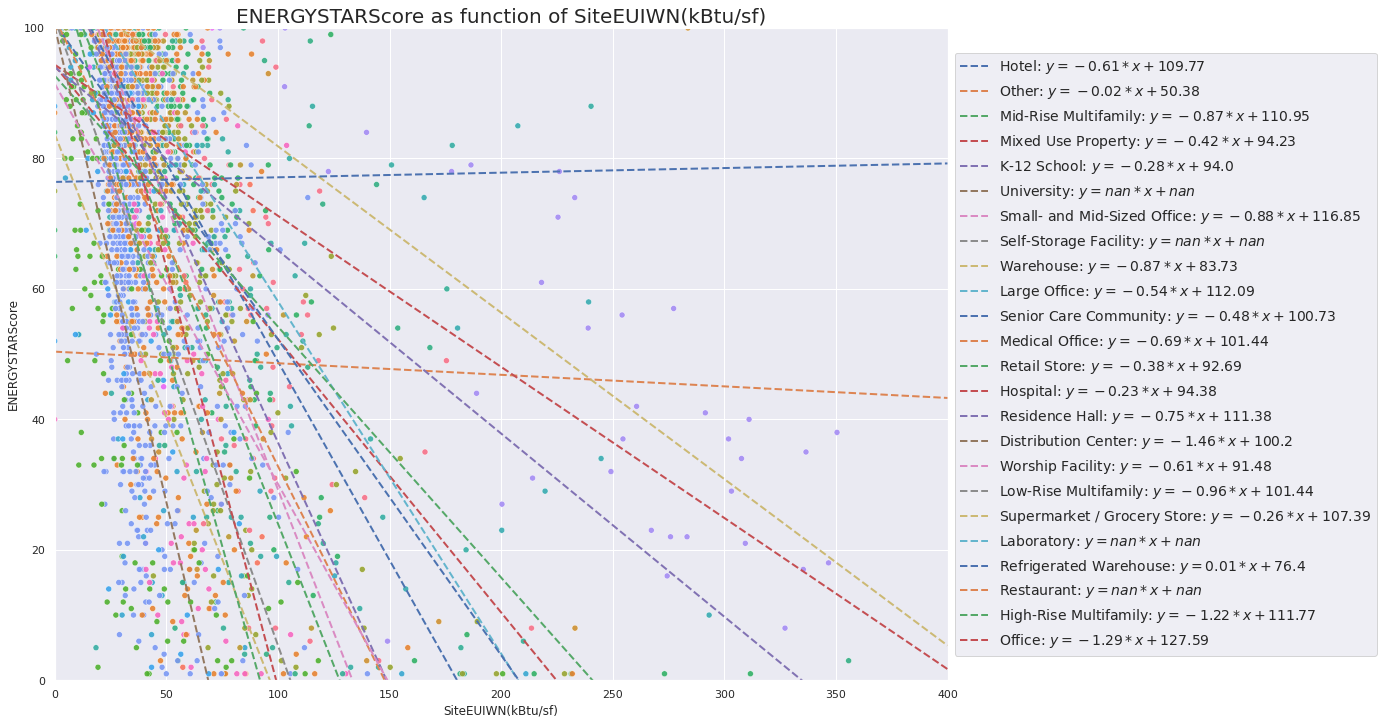

In [101]:
# Setup
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
plt.xlim(0,400) 
plt.ylim(0,100)

# Scatter plot
sns.scatterplot(x='SiteEUIWN(kBtu/sf)', y='ENERGYSTARScore', data=df, hue='PrimaryPropertyType', alpha=0.9, legend=False)
ax.set_title('ENERGYSTARScore as function of SiteEUIWN(kBtu/sf)', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

# Regression lines plot
# Valeurs extrèmes retirées pour SiteEUIWN(kBtu/sf)
for categ in df['PrimaryPropertyType'].unique():
  data=df[df['PrimaryPropertyType']==categ]
  data=data[data['SiteEUIWN(kBtu/sf)']<data['SiteEUIWN(kBtu/sf)'].quantile(q=0.9)]
  a = data['SiteEUIWN(kBtu/sf)'].cov(data['ENERGYSTARScore'])/data['SiteEUIWN(kBtu/sf)'].var()
  b = data['ENERGYSTARScore'].mean()-a*data['SiteEUIWN(kBtu/sf)'].mean()
  X = np.linspace(0,400)
  Y = a*X+b
  plt.plot(X,Y,ls='--', lw=2, label="{}: $ y={}*x + {}$".format(categ,a.round(2),b.round(2)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

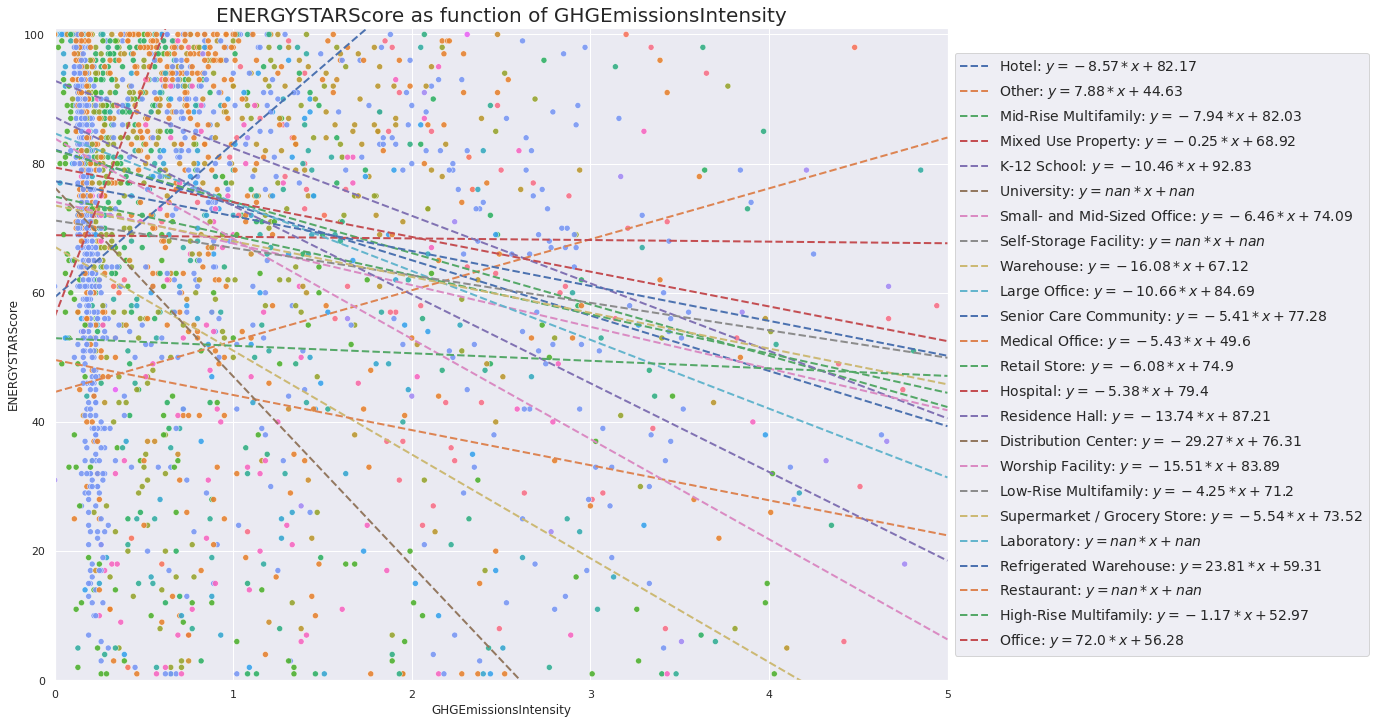

In [102]:
# Setup
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
plt.xlim(0,5) 
plt.ylim(0,101)

# Scatter plot
sns.scatterplot(x='GHGEmissionsIntensity', y='ENERGYSTARScore', data=df, hue='PrimaryPropertyType', alpha=0.9, legend=False)
ax.set_title('ENERGYSTARScore as function of GHGEmissionsIntensity', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

# Regression lines plot
# Valeurs extrèmes retirées pour GHGEmissionsIntensity
for categ in df['PrimaryPropertyType'].unique():
  data=df[df['PrimaryPropertyType']==categ]
  data=data[data['GHGEmissionsIntensity']<data['GHGEmissionsIntensity'].quantile(q=0.99)]
  a = data['GHGEmissionsIntensity'].cov(data['ENERGYSTARScore'])/data['GHGEmissionsIntensity'].var()
  b = data['ENERGYSTARScore'].mean()-a*data['GHGEmissionsIntensity'].mean()
  X = np.linspace(0,5)
  Y = a*X+b
  plt.plot(X,Y,ls='--', lw=2, label="{}: $ y={}*x + {}$".format(categ,a.round(2),b.round(2)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

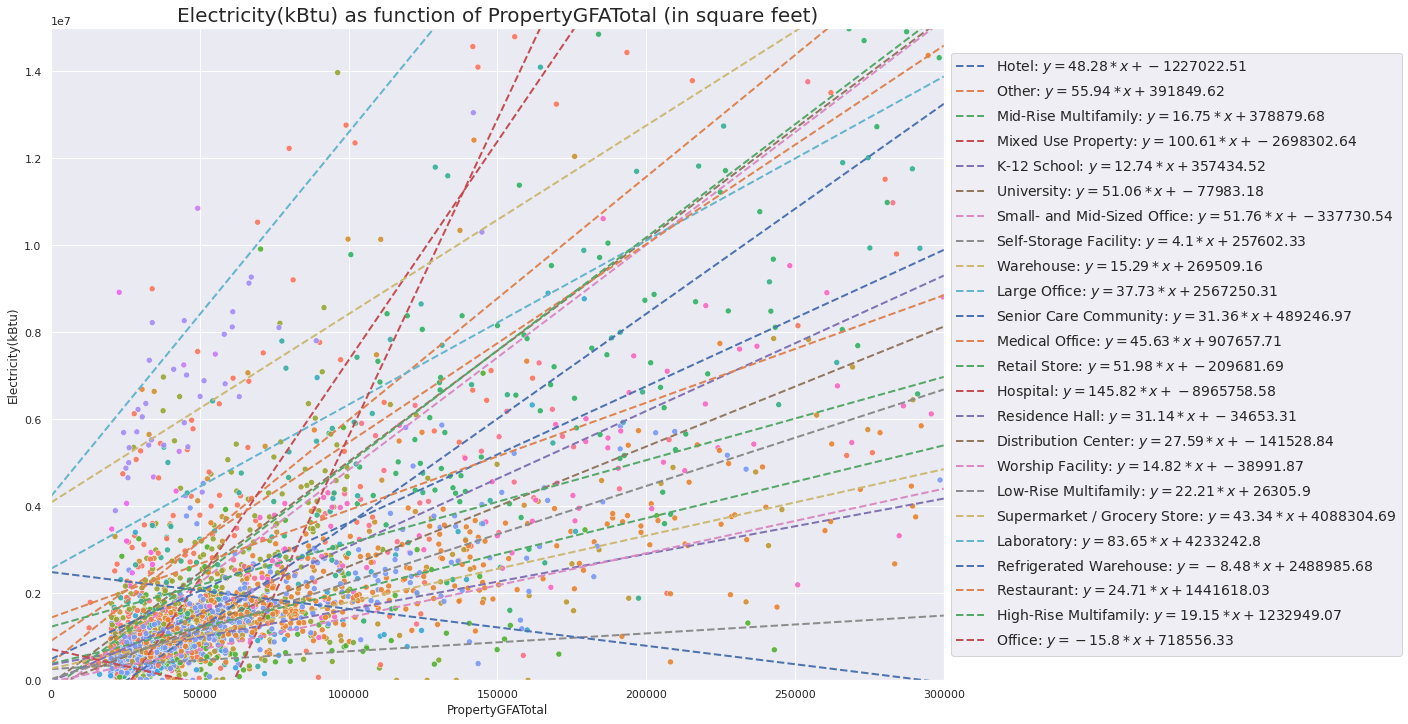

In [103]:
# Setup
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
plt.xlim(0, 3*(10**5)) 
plt.ylim(-10, 1.5*(10**7))

# Scatter plot
sns.scatterplot(x='PropertyGFATotal', y='Electricity(kBtu)', data=df, hue='PrimaryPropertyType', alpha=0.9, legend=False)
ax.set_title('Electricity(kBtu) as function of PropertyGFATotal (in square feet)', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

# Regression lines plot
# Valeurs extrèmes retirées pour PropertyGFATotal
for categ in df['PrimaryPropertyType'].unique():
  data=df[df['PrimaryPropertyType']==categ]
  data=data[data['PropertyGFATotal']<data['PropertyGFATotal'].quantile(q=0.95)]
  a = data['PropertyGFATotal'].cov(data['Electricity(kBtu)'])/data['PropertyGFATotal'].var()
  b = data['Electricity(kBtu)'].mean()-a*data['PropertyGFATotal'].mean()
  X = np.linspace(0,3*(10**5))
  Y = a*X+b
  plt.plot(X,Y,ls='--', lw=2, label="{}: $ y={}*x + {}$".format(categ,a.round(2),b.round(2)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

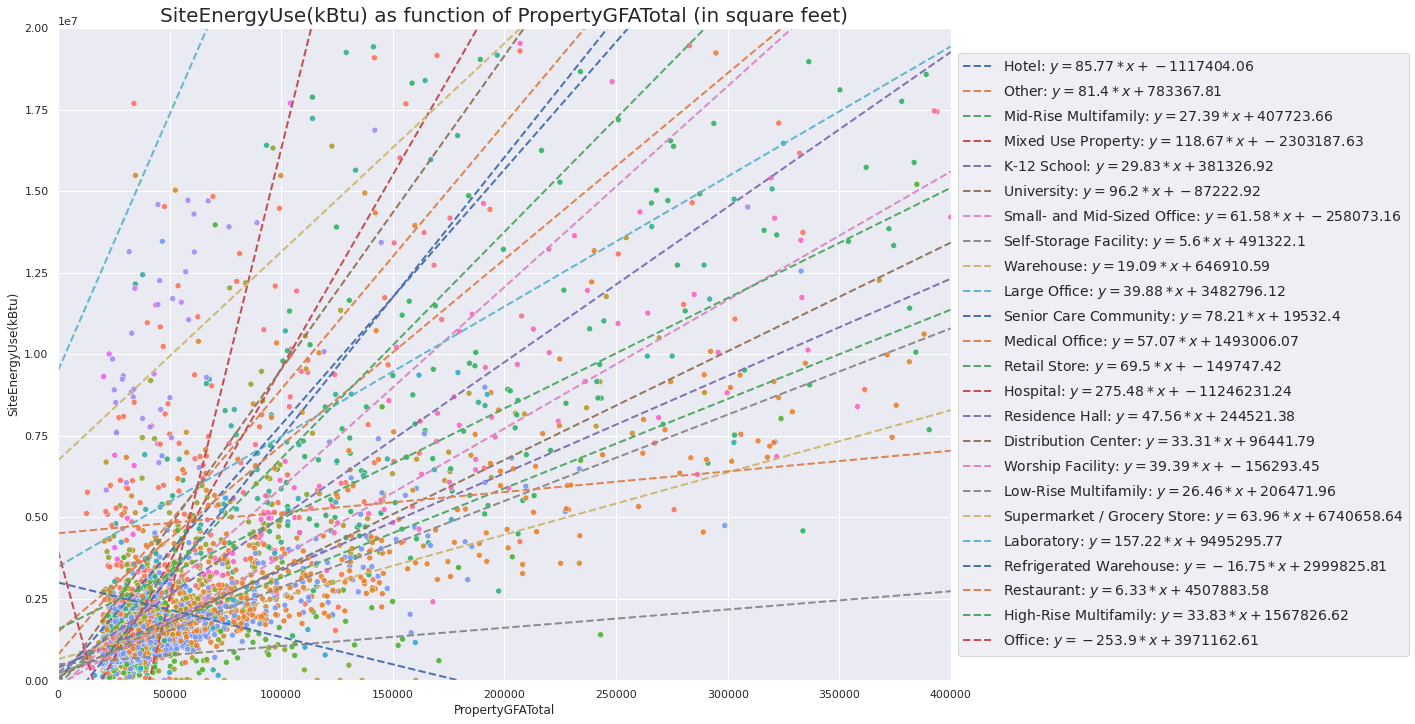

In [104]:
# Setup
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
plt.xlim(0, 4*(10**5)) 
plt.ylim(-10, 2*(10**7))

# Scatter plot
sns.scatterplot(x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', data=df, hue='PrimaryPropertyType', alpha=0.9, legend=False)
ax.set_title('SiteEnergyUse(kBtu) as function of PropertyGFATotal (in square feet)', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

# Regression lines plot
# Valeurs extrèmes retirées pour PropertyGFATotal
for categ in df['PrimaryPropertyType'].unique():
  data=df[df['PrimaryPropertyType']==categ]
  data=data[data['PropertyGFATotal']<data['PropertyGFATotal'].quantile(q=0.95)]
  a = data['PropertyGFATotal'].cov(data['SiteEnergyUse(kBtu)'])/data['PropertyGFATotal'].var()
  b = data['SiteEnergyUse(kBtu)'].mean()-a*data['PropertyGFATotal'].mean()
  X = np.linspace(0,4*(10**5))
  Y = a*X+b
  plt.plot(X,Y,ls='--', lw=2, label="{}: $ y={}*x + {}$".format(categ,a.round(2),b.round(2)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

Text(0.5, 1.0, 'SiteEnergyUse(kBtu) per Neighborhood')

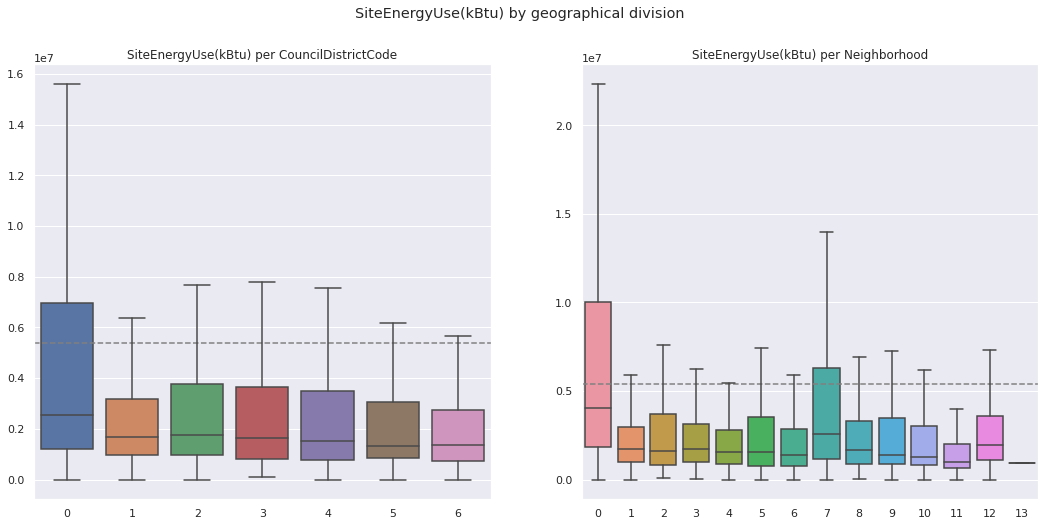

In [105]:
# data
data = [df.loc[(df['CouncilDistrictCode']==code), 'SiteEnergyUse(kBtu)'].values for code in df['CouncilDistrictCode'].unique()]
data2 = [df.loc[(df['Neighborhood']==code), 'SiteEnergyUse(kBtu)'].values for code in df['Neighborhood'].unique()]
mean = df['SiteEnergyUse(kBtu)'].mean()

# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8), facecolor='white')
fig.suptitle('SiteEnergyUse(kBtu) by geographical division')

# boxplots
ax[0].axhline(y=mean, ls='--', color='gray')
sns.boxplot(data=data, ax=ax[0], showfliers = False)
ax[0].set_title('SiteEnergyUse(kBtu) per CouncilDistrictCode')


ax[1].axhline(y=mean, ls='--', color='gray')
sns.boxplot(data=data2, ax=ax[1], showfliers = False)
ax[1].set_title('SiteEnergyUse(kBtu) per Neighborhood')

(-122.4, -122.26)

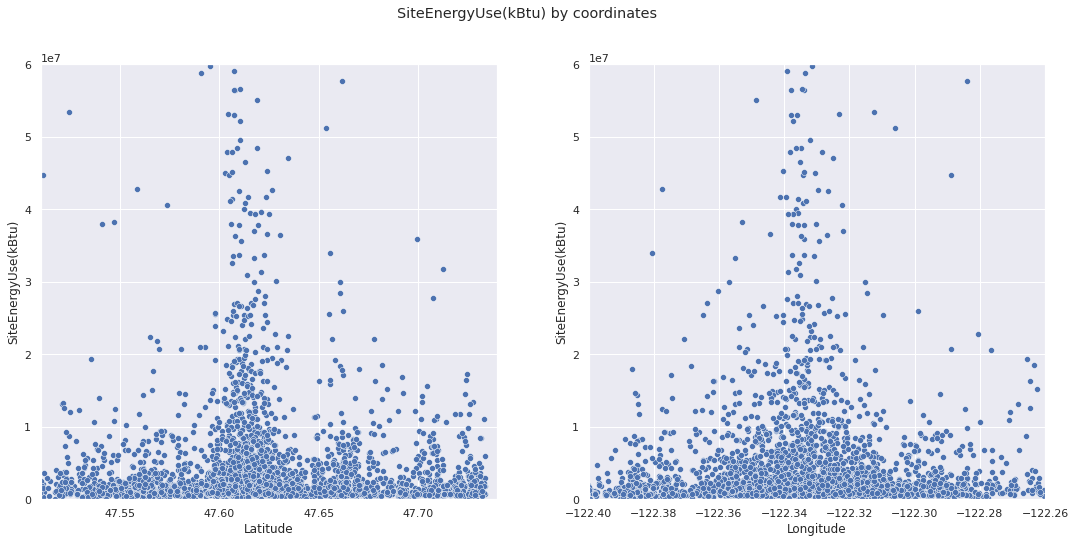

In [106]:
# Setup
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8), facecolor='white')
fig.suptitle('SiteEnergyUse(kBtu) by coordinates')

# Scatter plot
sns.scatterplot(data=df, x='Latitude', y='SiteEnergyUse(kBtu)', ax=ax[0])
ax[0].set_ylim(bottom=0, top=0.6*10**8)
ax[0].set_xlim(left=47.51, right=47.74)
sns.scatterplot(data=df, x='Longitude', y='SiteEnergyUse(kBtu)', ax=ax[1])
ax[1].set_ylim(bottom=0, top=0.6*10**8)
ax[1].set_xlim(left=-122.4, right=-122.26)

# **Partie 3 : Conclusions**

Le but de cette analyse exploratoire était d'analyser le dataset dans le but d'identifier des features intéréssantes qui pourraient nous permettre de prédire la consomation électrique d'une propriété et ses emmisions de gaz polluants de part ses caractéristiques. 

Dans cette optique on peut déjà oublier certaines features qui ne donnent pas d'informations qui permettent de prédire ces deux grandeurs. 

In [107]:
useless_cols=['OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'ListOfAllPropertyUseTypes', 
              'State', 'TaxParcelIdentificationNumber', 'DefaultData', 'Comments',
              'ComplianceStatus', 'Outlier', 'YearsENERGYSTARCertified']
df = df.loc[:, ~df.columns.isin(useless_cols)]

On cherche uniquement à prédire la consomation d'énergie totale et l'émission de gaz polluants des immeubles. Toutes les données énergétiques sauf celles-ci sont donc inutiles pour la prédiction (d'ailleurs si on en s'en servait pour les prédictions on serait dans le cas d'un data leakage).

In [108]:
useless_cols=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 
              'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
              'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
              'NaturalGas(kBtu)', 'GHGEmissionsIntensity']
df = df.loc[:, ~df.columns.isin(useless_cols)]

On note des différences de consommations au niveau des différents quartiers (et découpages Concil District). La position des immeubles semble donc avoir une corrélation avec la consomation (ne serait ce qu'un peu).
Il nous incombe à choisir le découpage géographique le plus propice pour l'algorithme de prédiction. 

Je choisis le Code Postal (Zip Code) comme donnée utile pour la prédiction. Le code postal est plus spécifique que les quartiers et le découpage Concil Disctrict (moins de biais). Le code postal est aussi bien moins spécifique que les coordonnées GPS qui le sont trop (trop de variance). 

In [109]:
useless_cols=['CouncilDistrictCode','Neighborhood', 'Latitude', 'Longitude']
df = df.loc[:, ~df.columns.isin(useless_cols)]

On peut retirer la feature donnant la surface totale de la propriété car elle peut être retrouvée simplement en sommant les features de surface des batiments et surface des parkings. 

In [110]:
useless_cols=['PropertyGFATotal']
df = df.loc[:, ~df.columns.isin(useless_cols)]

On peut retirer la feature PrimaryPropertyType car elle est redondante avec LargestPropertyUseType. 

In [113]:
useless_cols=['PrimaryPropertyType']
df = df.loc[:, ~df.columns.isin(useless_cols)]

YearBuilt serrait mieux comprise si on donnait plutôt l'age du bâtiment. On modifie la colonne pour la faire correspondre à l'age du bâtiment. 

In [115]:
df['YearBuilt'] = 2022-df['YearBuilt']
df = df.rename(columns={'YearBuilt':'Age'})

On a donc réduit les features pour se retrouver avec des features qui nous donnent des informations sur :    


*   Le type de la propriété
*   La forme de la propriété (étages et nombre de bâtiments)
*   La taille de la propriété (surface, surface parking)
*   L'utilisation de la propriété (utilisations et leur surface)
*   L'energy star score
*   Les consomations et rejets de poluants



In [121]:
df.columns

Index(['BuildingType', 'ZipCode', 'Age', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [122]:
df.to_csv('drive/MyDrive/CSV/2016_Building_Energy_Benchmarking2.csv')